In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
# Load data
# iris = datasets.load_iris()
# print(iris)

dataset = pd.read_csv('./../../data/XAUUSD_2010-2023.csv')
print(dataset)

                       time     open     high      low    close  rsi14  \
0       2010-01-03 18:00:00  1098.45  1100.00  1098.05  1099.95  81.98   
1       2010-01-03 18:05:00  1100.00  1100.30  1099.45  1099.75  79.17   
2       2010-01-03 18:10:00  1099.70  1100.10  1099.30  1099.45  75.02   
3       2010-01-03 18:15:00  1099.50  1099.60  1098.50  1099.45  75.02   
4       2010-01-03 18:20:00  1099.40  1099.60  1098.90  1098.90  67.50   
...                     ...      ...      ...      ...      ...    ...   
985999  2023-12-29 16:35:00  2063.07  2063.24  2062.60  2062.96  39.44   
986000  2023-12-29 16:40:00  2062.95  2063.09  2062.52  2062.61  37.12   
986001  2023-12-29 16:45:00  2062.60  2062.83  2062.34  2062.56  36.79   
986002  2023-12-29 16:50:00  2062.56  2063.20  2062.51  2062.54  36.65   
986003  2023-12-29 16:55:00  2062.52  2063.00  2062.37  2062.73  39.05   

          sma14  
0       1096.38  
1       1096.72  
2       1097.03  
3       1097.30  
4       1097.50  
...

In [16]:
# features = iris.data
# print(features)
dataset = pd.read_csv('./../../data/XAUUSD_2010-2023.csv')
# print(dataset)

dataku = pd.DataFrame(dataset)
# // limit
dataset = dataku.head(1000)

# konverksi ke data array
dataset = dataset[['open', 'close']]
dataset

features = np.asarray(dataset)
print(features)

[[1098.45 1099.95]
 [1100.   1099.75]
 [1099.7  1099.45]
 ...
 [1130.28 1130.25]
 [1130.23 1130.1 ]
 [1130.18 1129.33]]


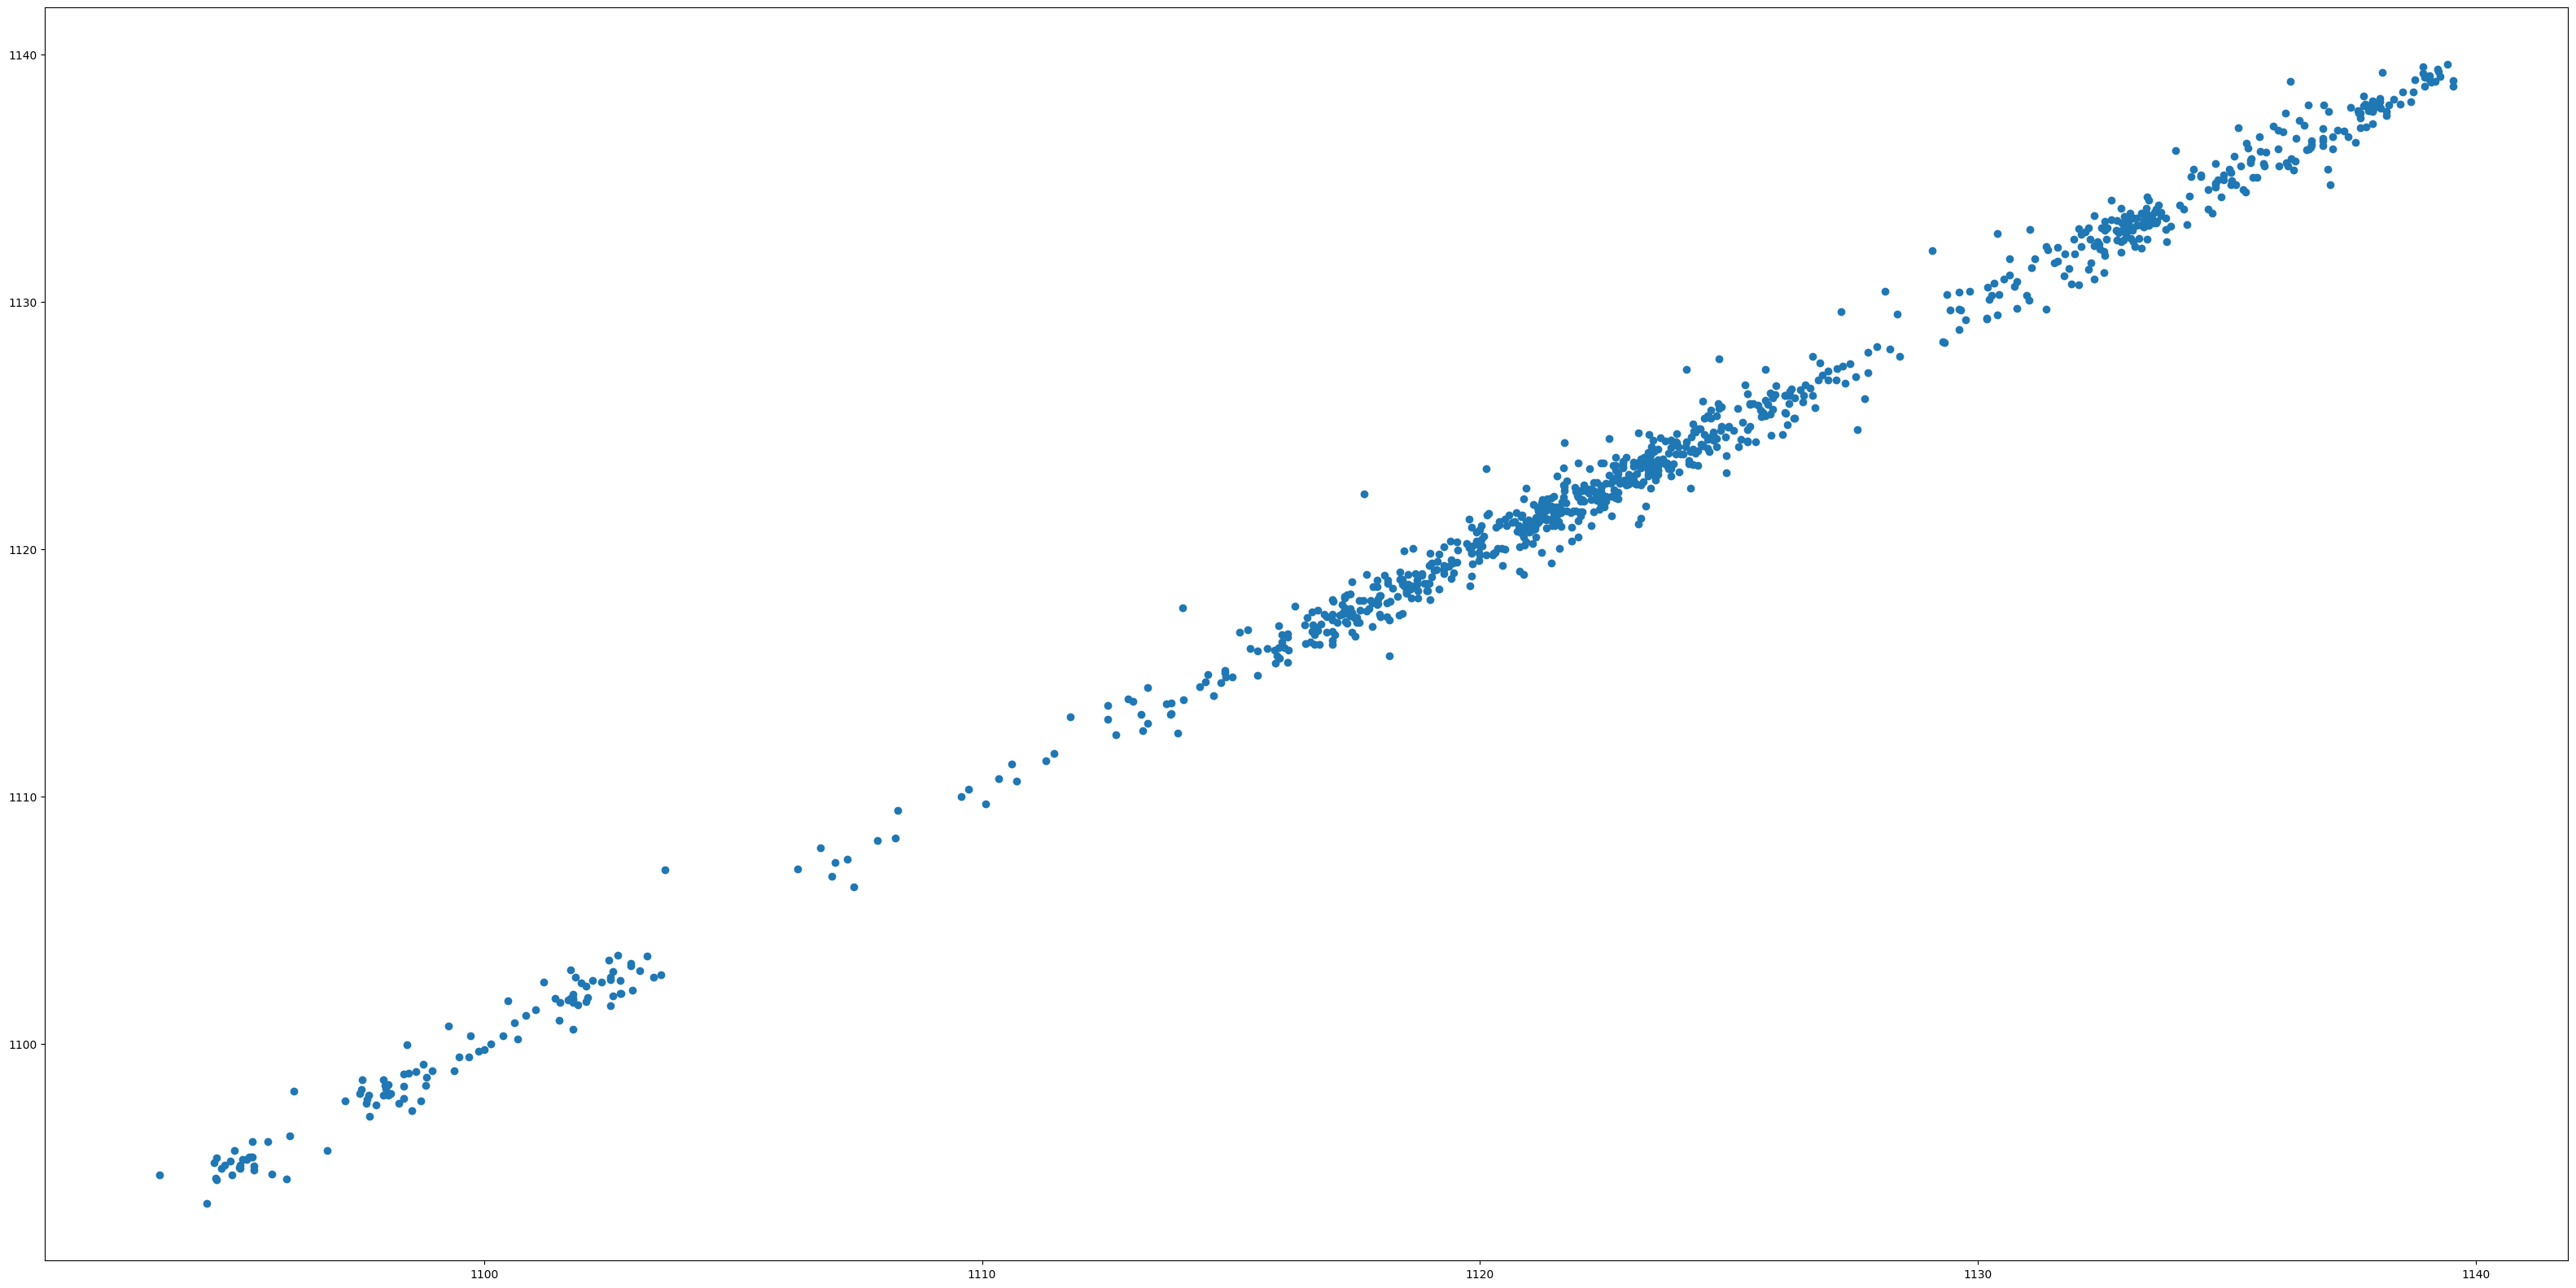

In [41]:
plt.figure(figsize=(40,20))
plt.scatter(features[:, 0],
            features[:, 1])
plt.show()

In [19]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

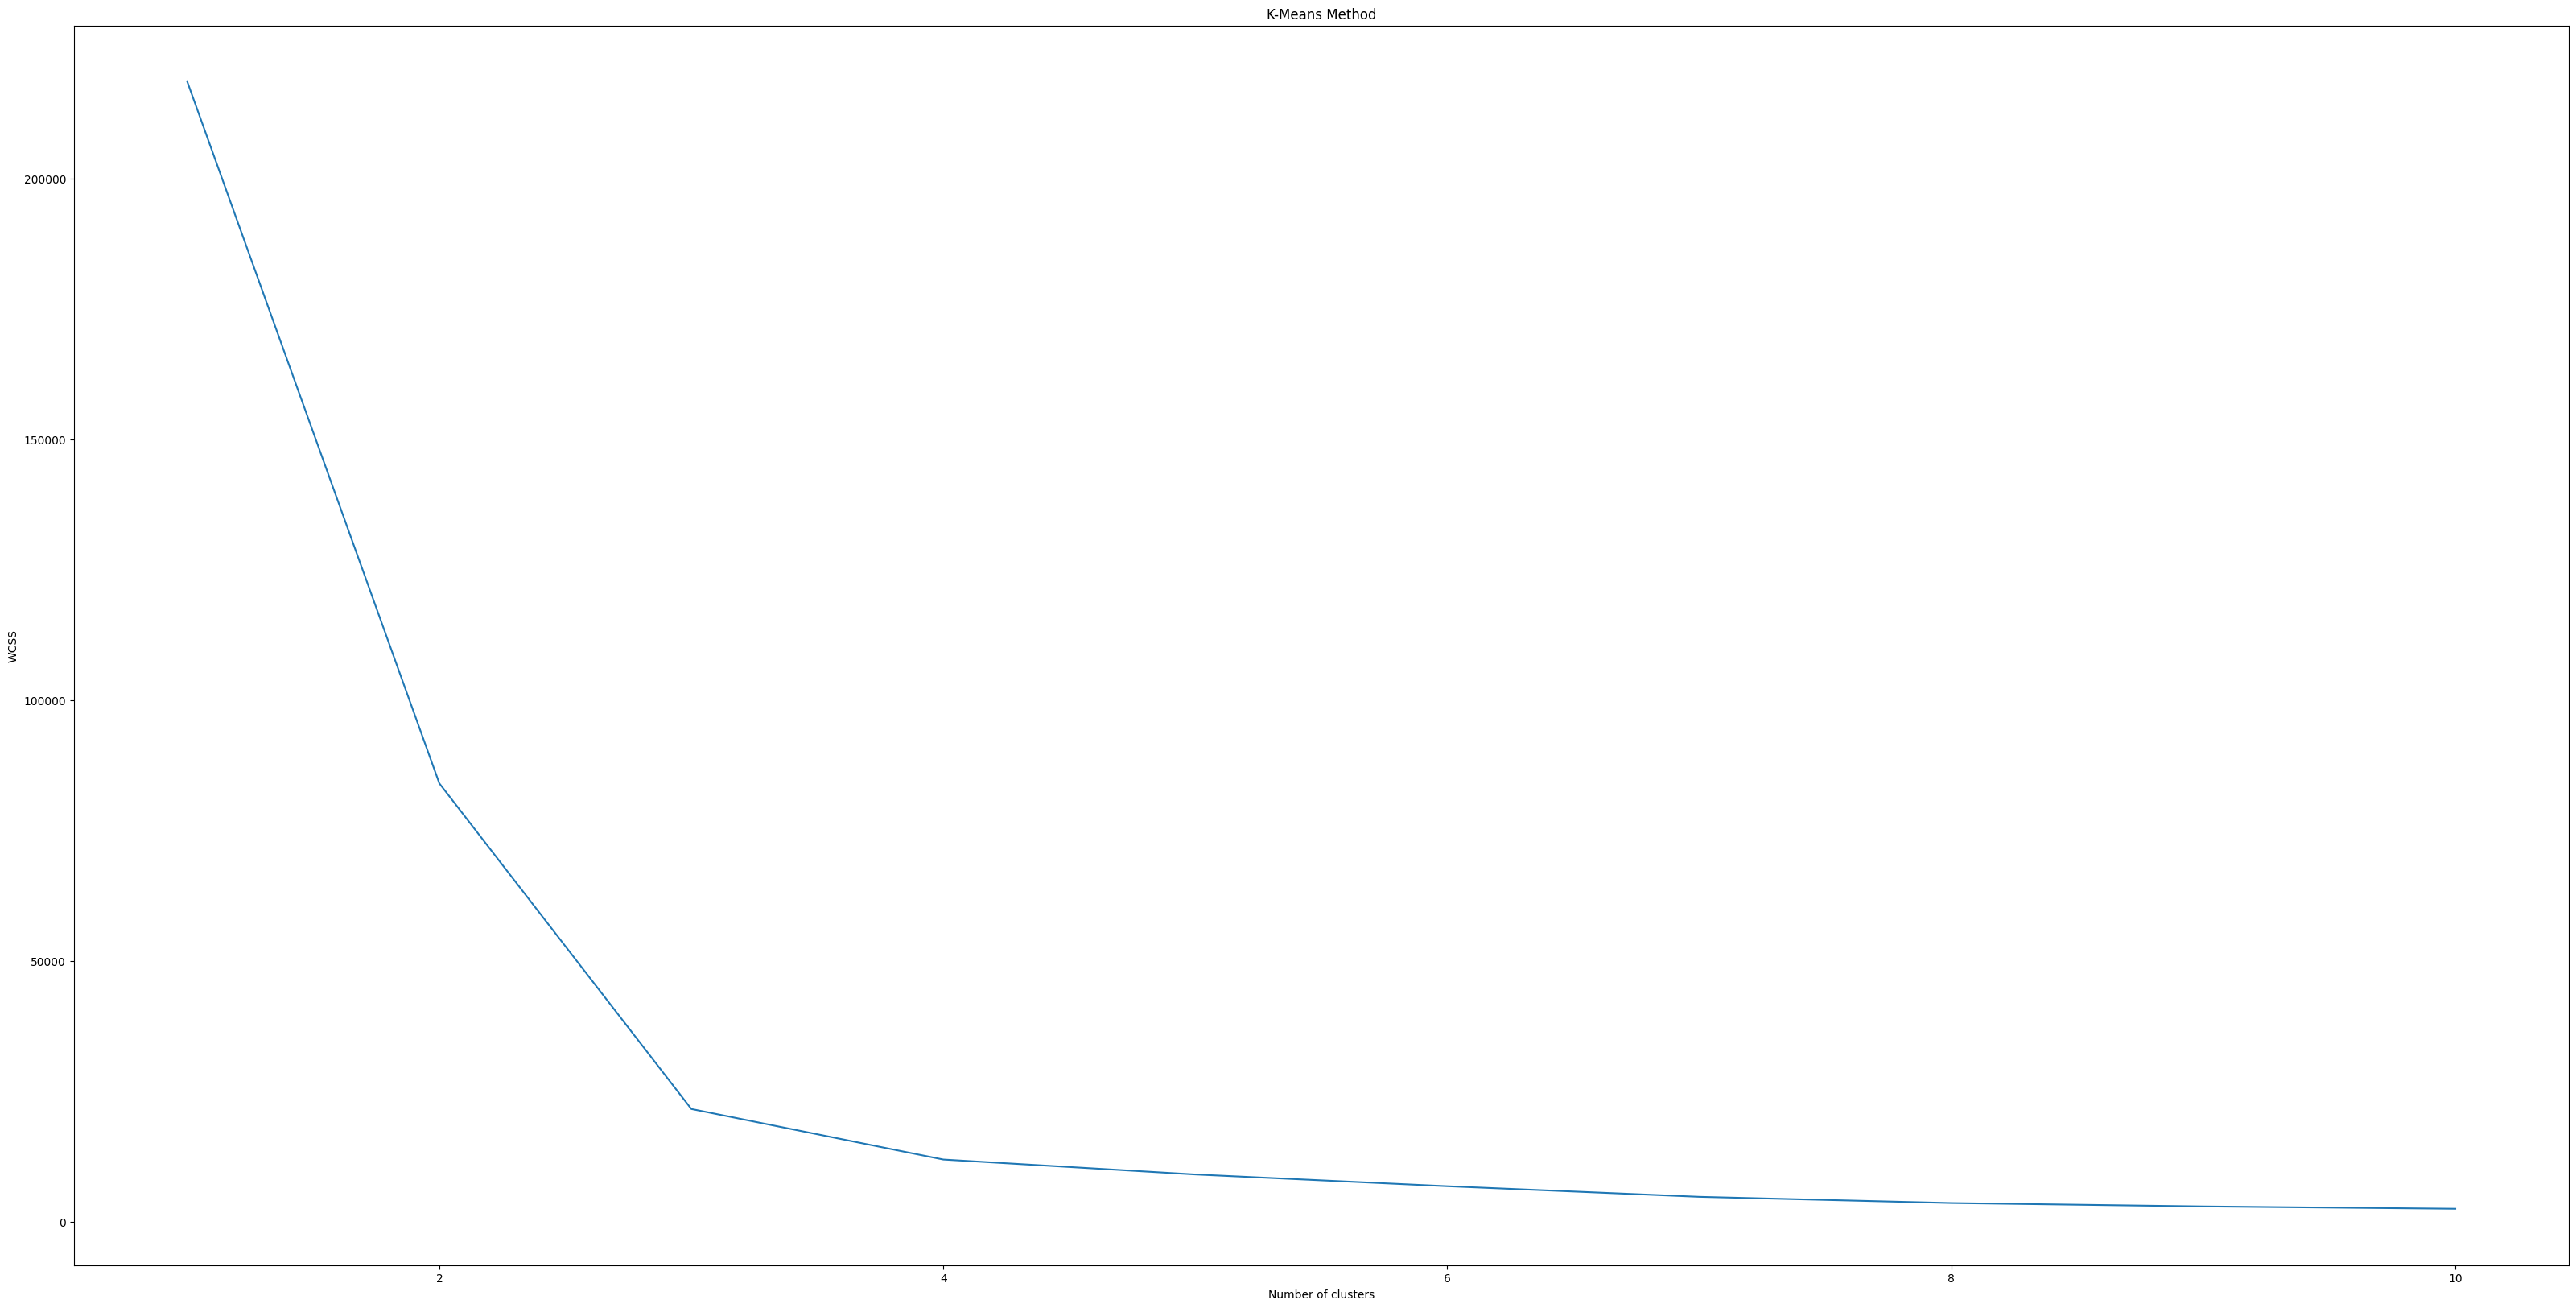

[218527.42189870003,
 84060.47619167995,
 21642.65642904026,
 11953.39578775195,
 9092.31932421769,
 6838.775996287416,
 4810.087379452405,
 3620.1056211559817,
 2969.61608555317,
 2517.4298473980416]

In [40]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(40,20))
plt.plot(range(1, 11), wcss)
plt.title("K-Means Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
wcss

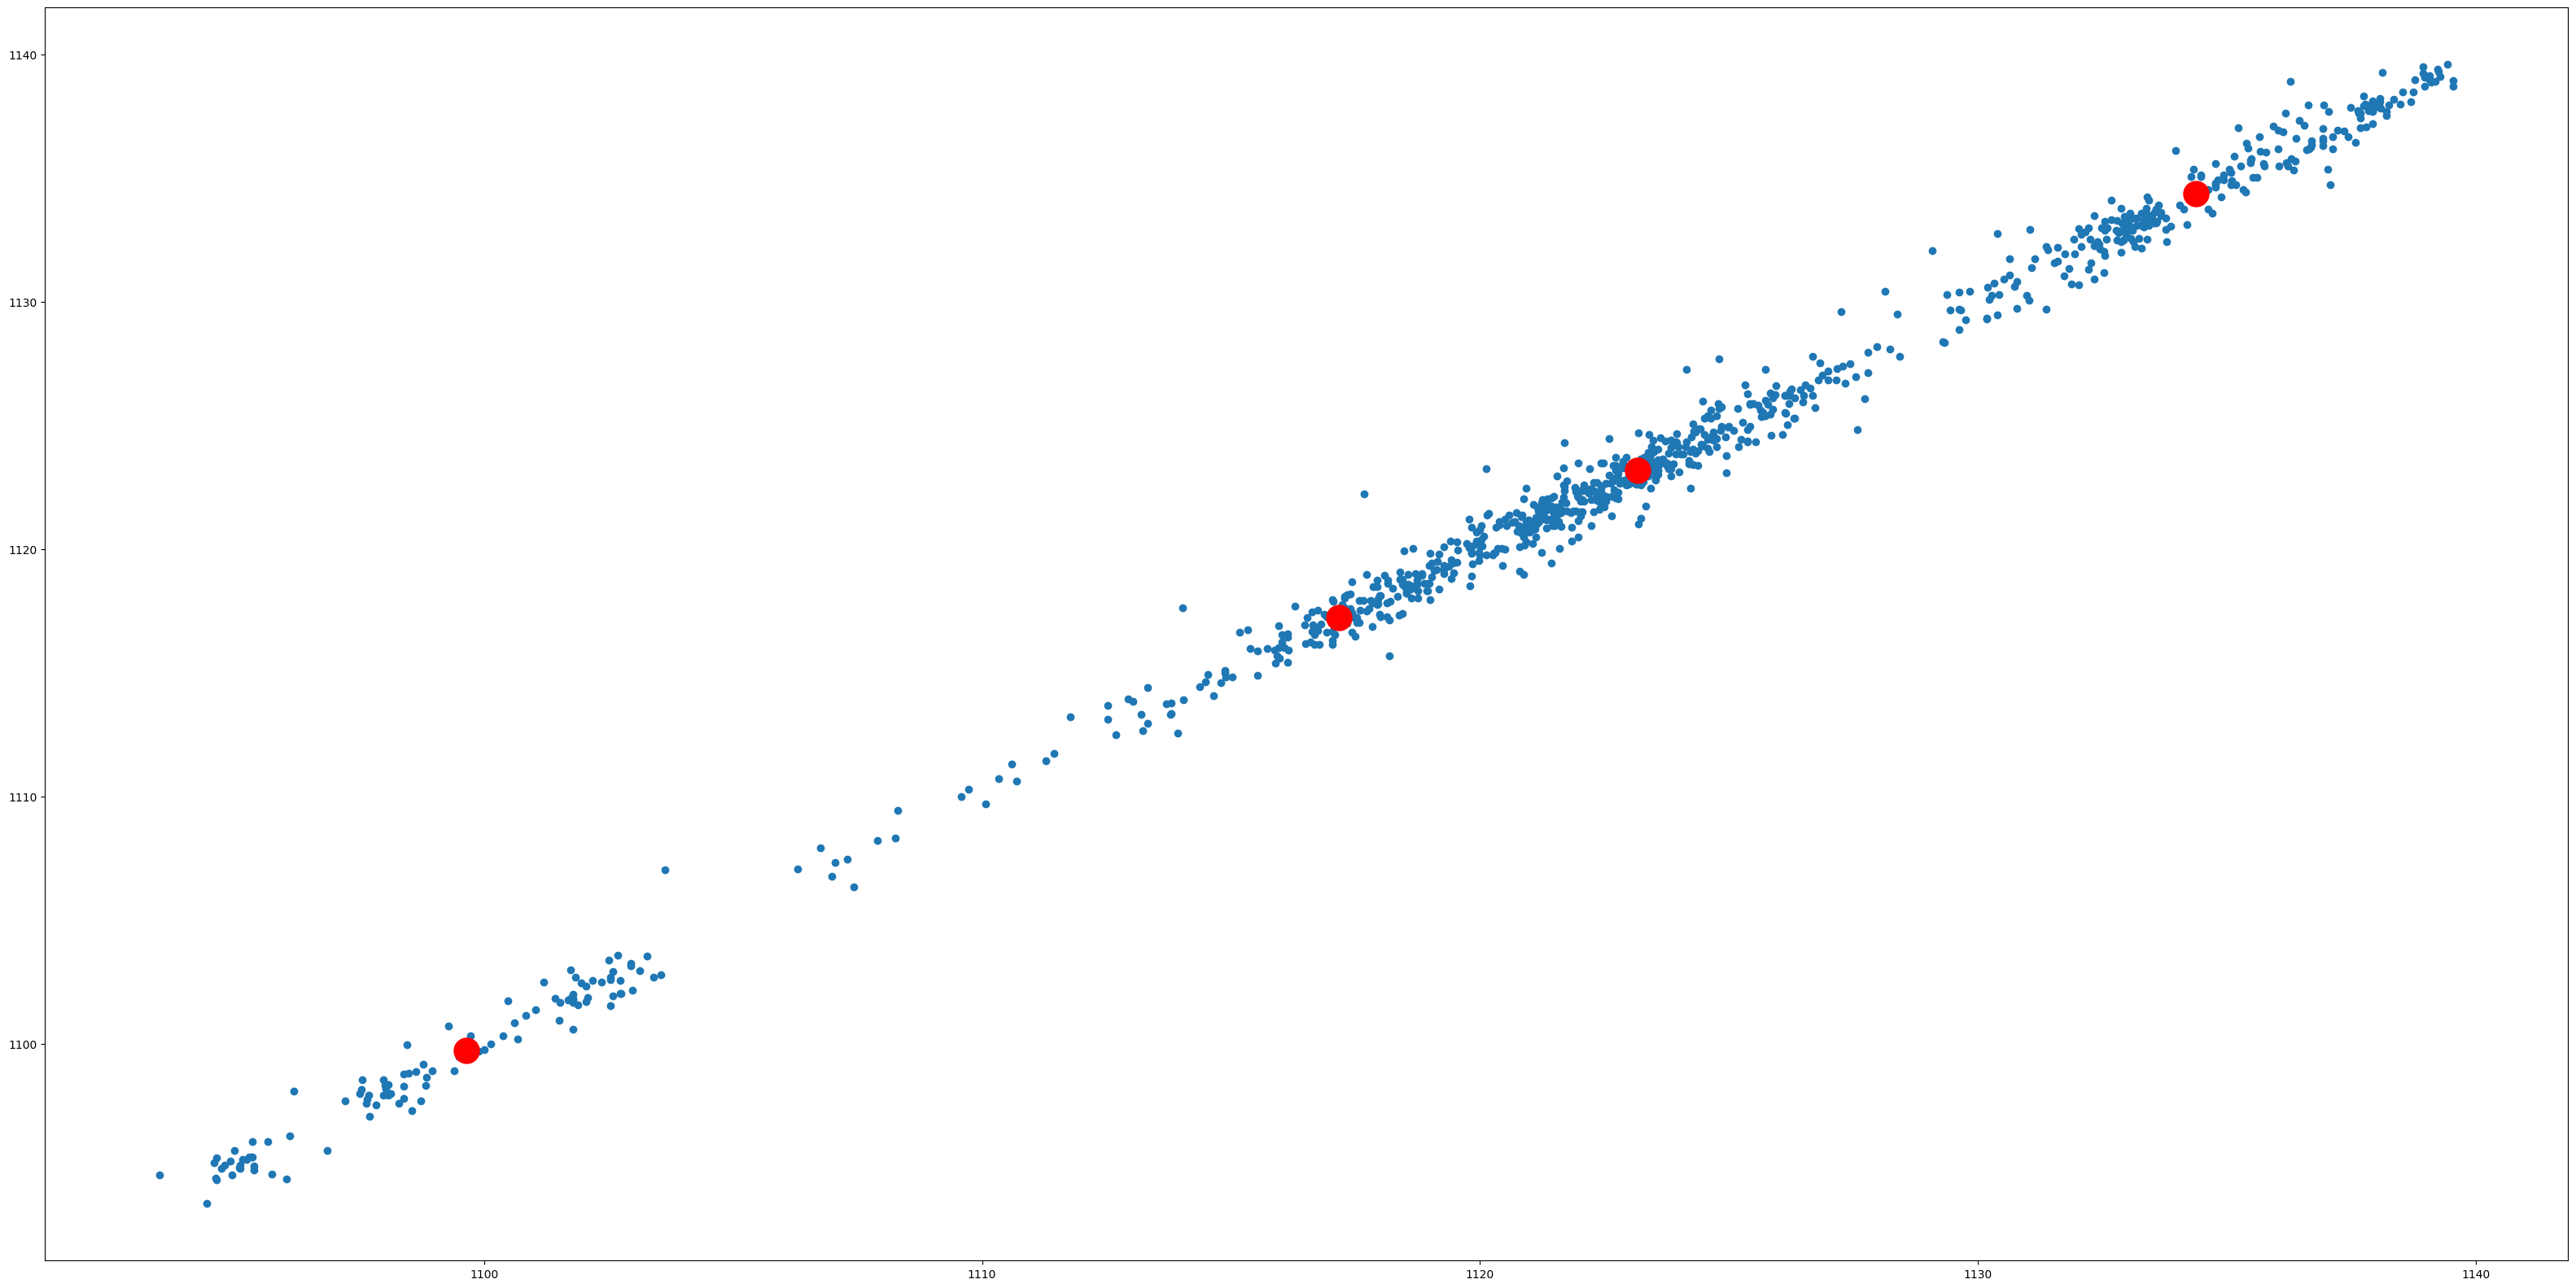

In [39]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    max_iter=300,
    n_init=18,
    random_state=0
)
pred_y = kmeans.fit_predict(features)
# plt.figure().set_figheight(20,40)
plt.figure(figsize=(40,20))
plt.scatter(
    features[:, 0],
    features[:, 1]
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=500,
    c='red',

)
plt.show()